# EDA Flipkard Products
**Цель**: Исследовать продажи, рейтинги, характеристики и закономерности в данных  
  
**Источник данных**: data/flipkard_cleaned.csv

## 1. Загрузка данных и подключение библиотек

In [2]:
#подключение библиотек 
#работа с данными 
import pandas as pd
import numpy as np
from scipy.stats import zscore

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#загрузка данных
df = pd.read_csv('../data/flipkard_cleaned.csv')
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,weight_g,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,1.9,...,3038.23,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,3.2,...,1921.82,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,4.4,...,1143.49,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,2.8,...,3644.81,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,3.7,...,310.33,0,Blue,Unknown,30,True,"CARD,Wallet",386.061014,79.27,4.90


## 2. Общий обзор данных

In [4]:
#размер таблицы
df.shape

(80000, 25)

In [5]:
#типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          80000 non-null  object 
 1   product_name        80000 non-null  object 
 2   category            80000 non-null  object 
 3   brand               80000 non-null  object 
 4   seller              80000 non-null  object 
 5   seller_city         80000 non-null  object 
 6   price               80000 non-null  float64
 7   discount_percent    80000 non-null  int64  
 8   final_price         80000 non-null  float64
 9   rating              80000 non-null  float64
 10  review_count        80000 non-null  int64  
 11  stock_available     80000 non-null  int64  
 12  units_sold          80000 non-null  int64  
 13  listing_date        80000 non-null  object 
 14  delivery_days       80000 non-null  int64  
 15  weight_g            80000 non-null  float64
 16  warr

In [6]:
#статистика по числовым признакам 
df.describe()

,price,discount_percent,final_price,rating,review_count,stock_available,units_sold,delivery_days,weight_g,warranty_months,return_policy_days,shipping_weight_g,product_score,seller_rating
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000
mean,30137.256454,21.350625,23697.780600,2.999671,25102.249875,499.194262,2507.515775,6.006325,2522.224622,15.56400,12.362250,2899.960047,50.673750,4.002218
std,17274.048682,16.354446,14726.821259,1.156238,14428.769942,288.917706,1439.519972,3.160630,1428.287966,12.91307,10.019794,1650.921766,28.562732,0.577595
min,200.140000,0.000000,101.080000,1.000000,0.000000,0.000000,0.000000,1.000000,50.020000,0.00000,0.000000,53.155250,1.000000,3.000000
25%,15180.205000,10.000000,11341.722500,2.000000,12605.000000,249.000000,1261.000000,3.000000,1283.117500,6.00000,7.000000,1469.583781,25.950000,3.500000
50%,30164.455000,20.000000,22571.265000,3.000000,25166.500000,499.000000,2513.000000,6.000000,2524.550000,12.00000,10.000000,2892.632502,50.670000,4.010000
75%,45077.087500,40.000000,34521.057500,4.000000,37666.000000,749.000000,3754.000000,9.000000,3753.195000,24.00000,15.000000,4304.695597,75.430000,4.500000
max,59995.800000,50.000000,59995.800000,5.000000,49999.000000,999.000000,4999.000000,11.000000,4999.920000,36.00000,30.000000,6234.757448,100.000000,5.000000


In [7]:
#пропуски
df.isnull().sum()

product_id            0
product_name          0
category              0
brand                 0
seller                0
seller_city           0
price                 0
discount_percent      0
final_price           0
rating                0
review_count          0
stock_available       0
units_sold            0
listing_date          0
delivery_days         0
weight_g              0
warranty_months       0
color                 0
size                  0
return_policy_days    0
is_returnable         0
payment_modes         0
shipping_weight_g     0
product_score         0
seller_rating         0
dtype: int64

In [8]:
#дубликаты 
df.duplicated().sum()

np.int64(0)

**Вывод:** набор данных содержит 80000 записей о товарах с 25 признаками, включая как числовые, так и категориальные типы данных. Пропуски и дубликаты отсутсвуют

## 3. Распределение числовых признаков 

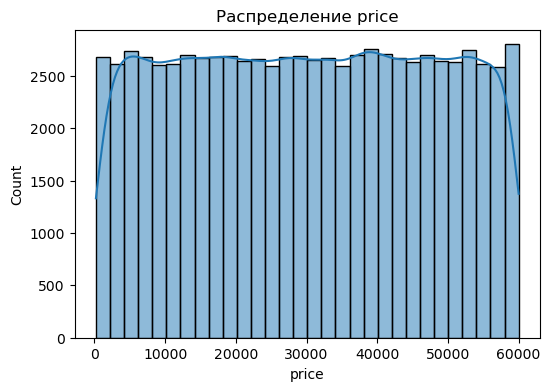

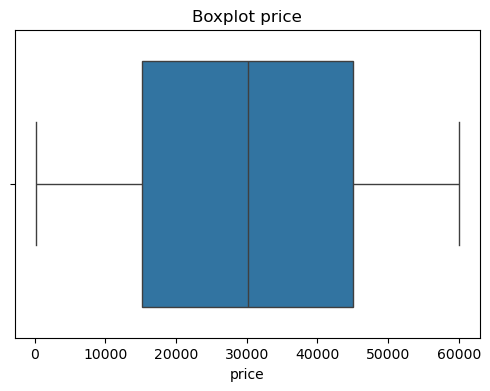

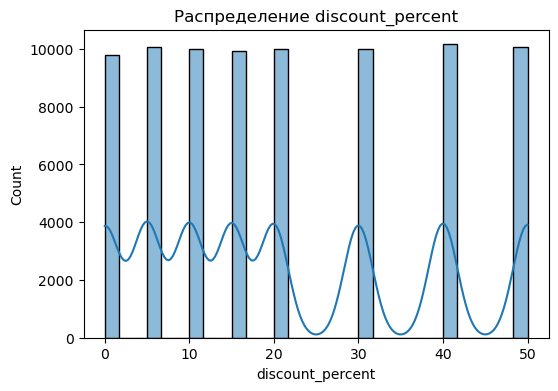

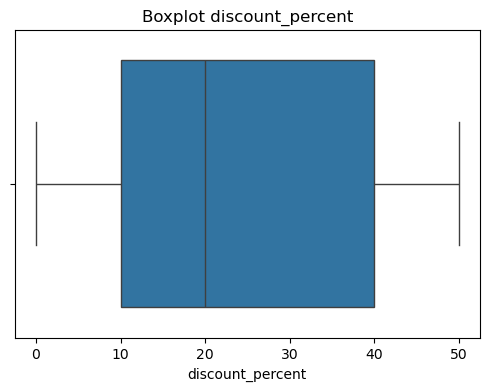

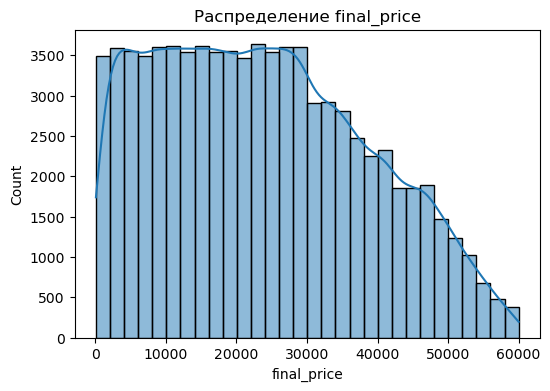

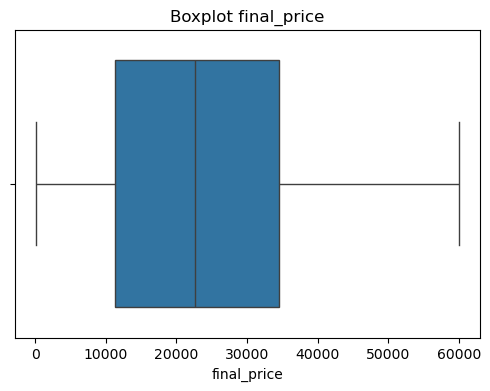

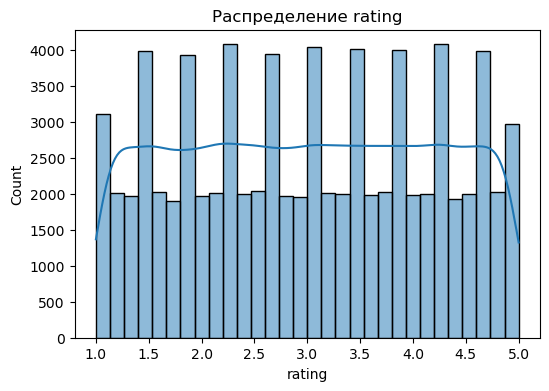

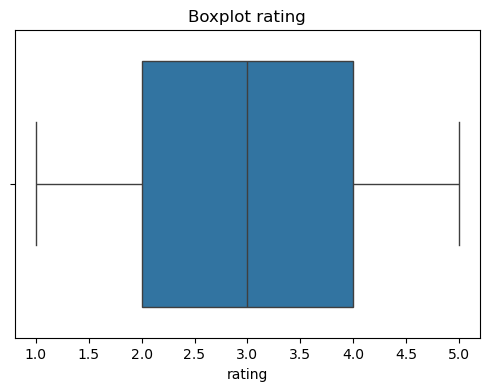

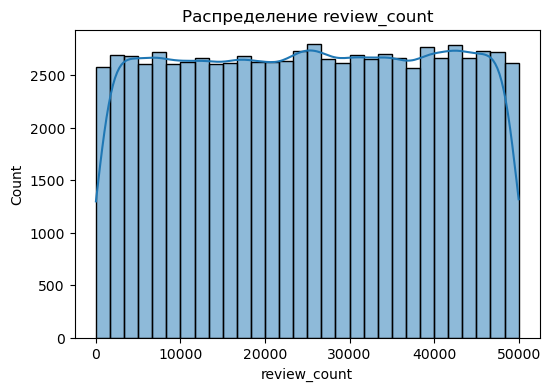

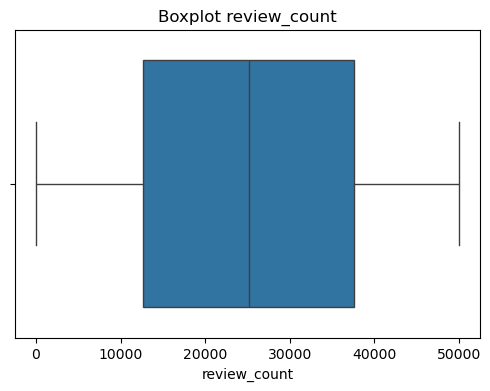

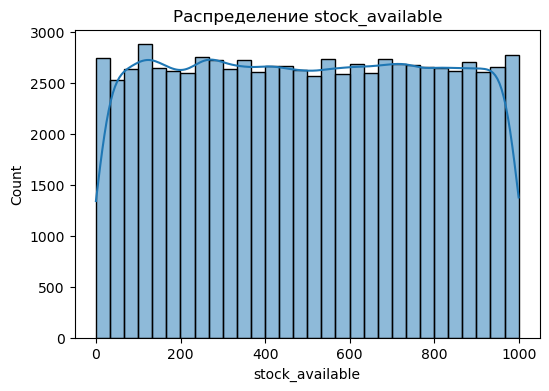

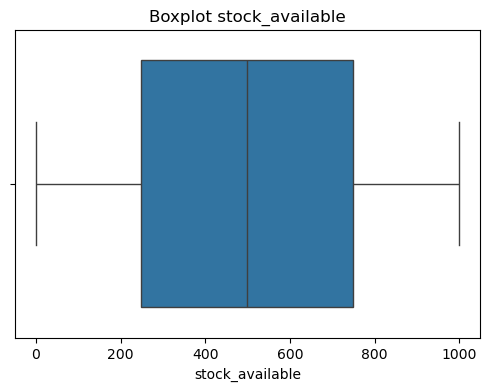

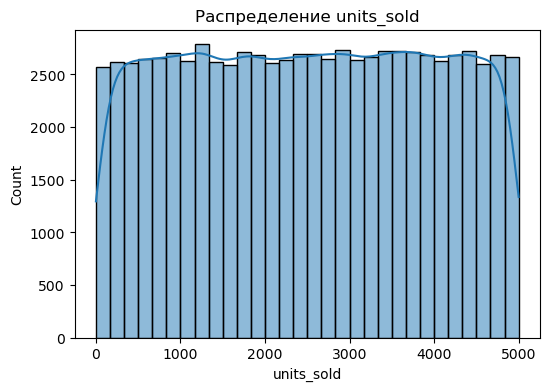

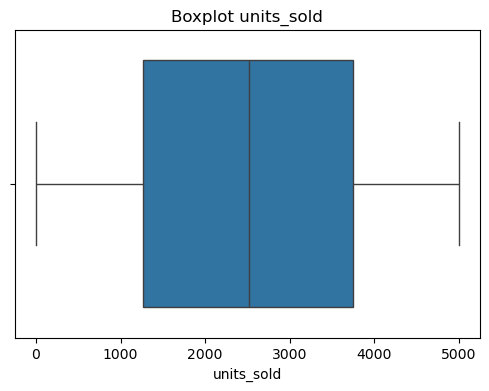

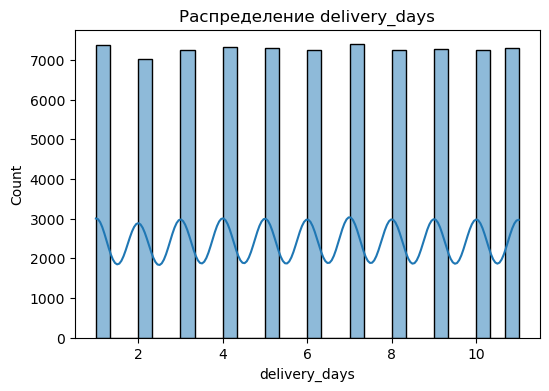

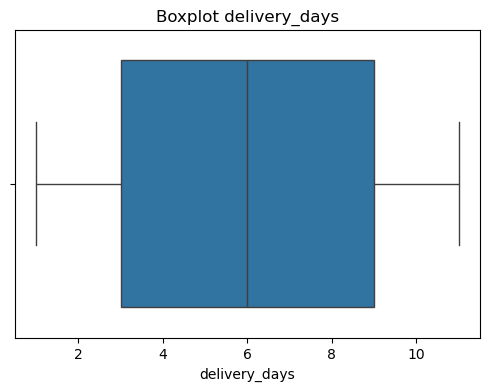

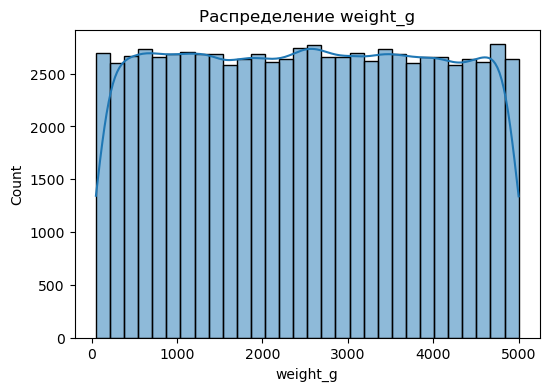

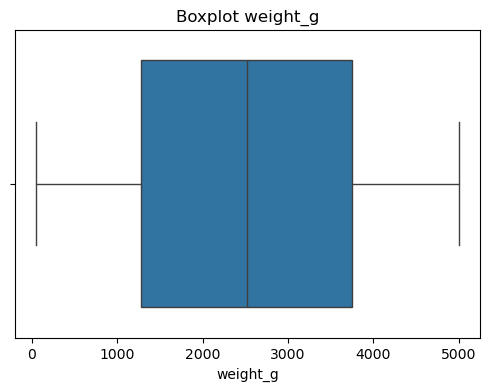

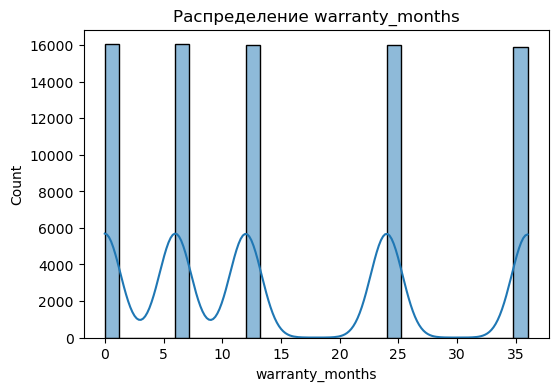

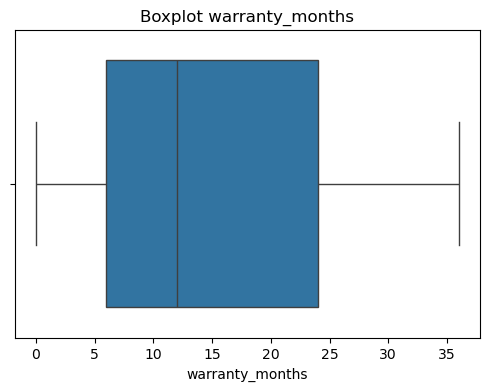

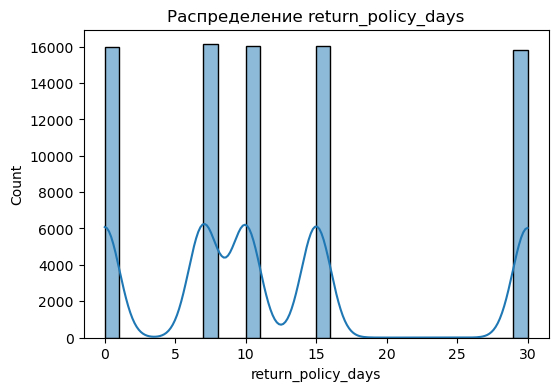

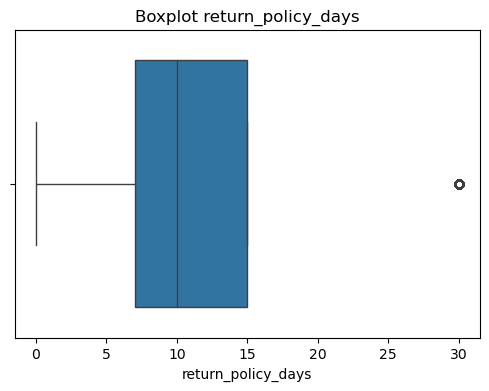

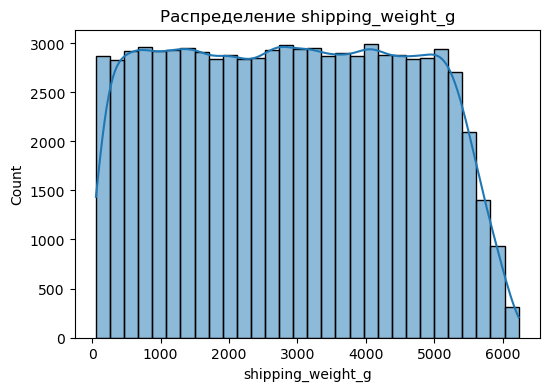

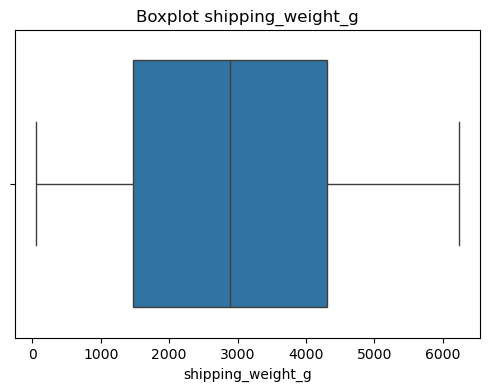

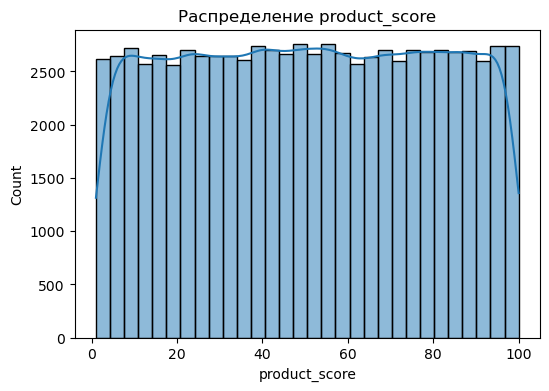

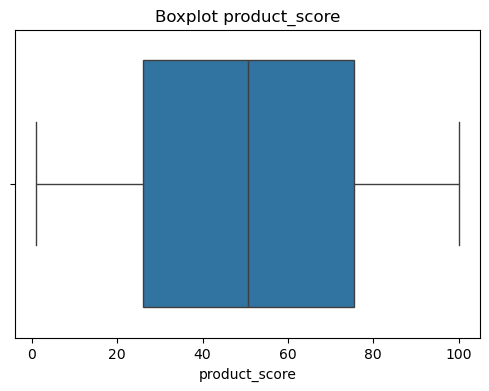

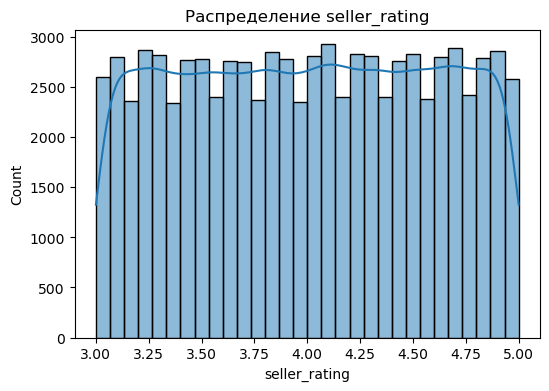

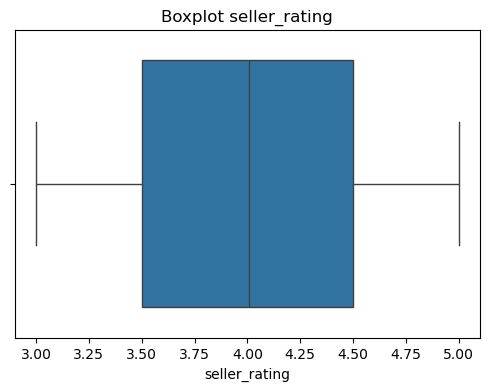

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    #гистограммы для числовых данных
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.savefig(f'../images/distribution/{col}_histplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    #ящик с усами (boxplot) для поиска выбросов 
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.savefig(f'../images/distribution/{col}_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

**Вывод:**  
– цена: Цены распределены равномерно в широком диапазоне, без выраженной асимметрии и выбросов. Это указывает на разнообразие товаров в датасете — от бюджетных до более дорогих, без перекоса в сторону одного ценового сегмента.  
– скидка: Скидки принимают дискретные значения и концентрируются на стандартных уровнях (0%, 10%, 20%, 30%, 40%, 50%). Медианное значение около 20%, а основной диапазон лежит в пределах 10–40%. Это отражает типичную промо-логику и отсутствие аномальных значений.  
– цена со скидкой: финальная цена имеет правостороннюю асимметрию, что типично для реальных данных о продажах: дешёвых товаров больше, дорогие — представлены в меньшем количестве.  
– рейтинг: Рейтинги в данных в основном сосредоточены вокруг средней оценки 3, распределение симметричное, с некоторыми частыми значениями, но без выраженных выбросов.  
– возврат: Политики возврата представлены дискретными значениями, все встречаются примерно одинаково часто. Медиана 10 дней отражает среднее значение среди дискретных вариантов, а выброс на 30 дней показывает наличие редких, но официально фиксированных длительных вариантов возврата.  
– вес при транспортировке: Распределение веса имеет правостороннюю асимметрию, что характерно для большинства товаров: лёгкие и средние по весу позиции встречаются чаще, тогда как тяжёлые товары встречаются относительно редко, образуя длинный правый хвост распределения.  

## 4. Корреляция между числовыми признаками

**Цель:** выявить значимые линейные зависимости между числовыми признаками и потенциальные факторы, влияющие на продажи и выручку.

Text(0.5, 1.0, 'Корреляция признаков')

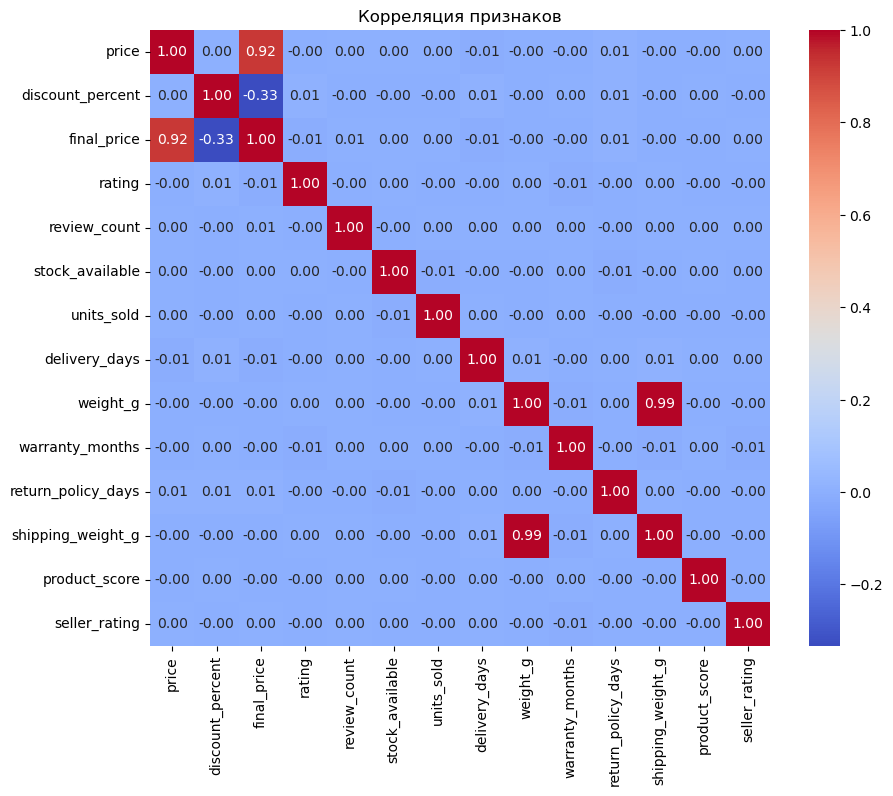

In [10]:
#корреляционная матрица
corr = df.select_dtypes(include=np.number).corr()
#тепловая карта 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig(f'../images/correlation/features_cor.png', dpi=300, bbox_inches='tight')
plt.title('Корреляция признаков')

**Вывод**: Большинство выявленных корреляций носят технический характер и подтверждают внутреннюю согласованность данных. Существенных линейных зависимостей между ключевыми бизнес-показателями не выявлено, что указывает на сложную структуру спроса и возможное влияние неучтённых факторов

## 5. Анализ категориальных признаков 

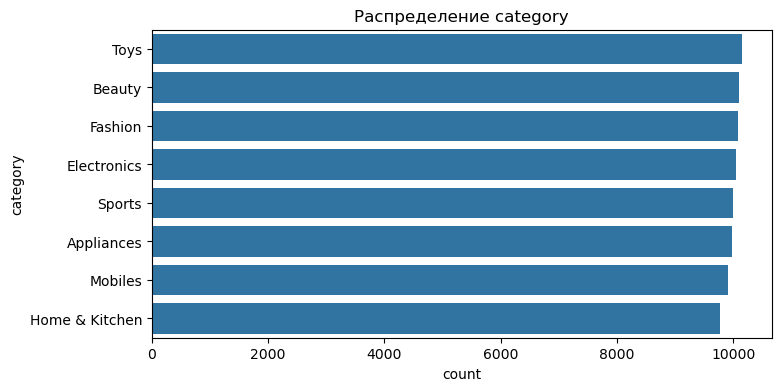

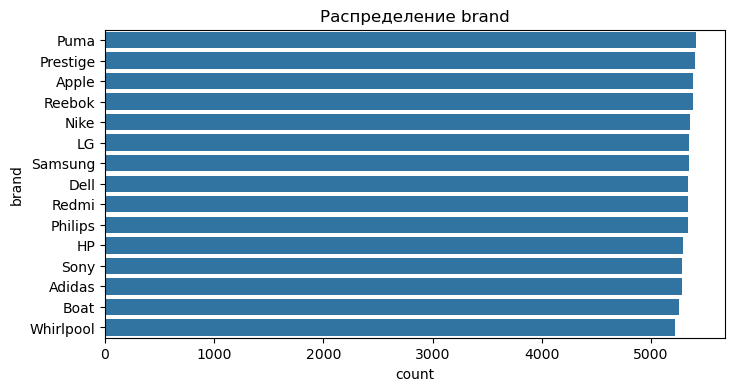

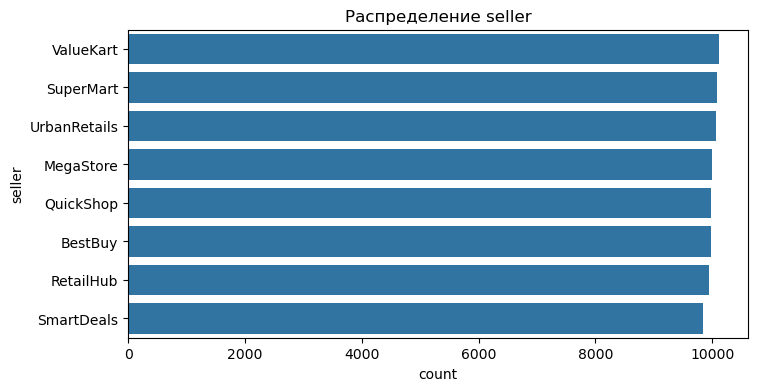

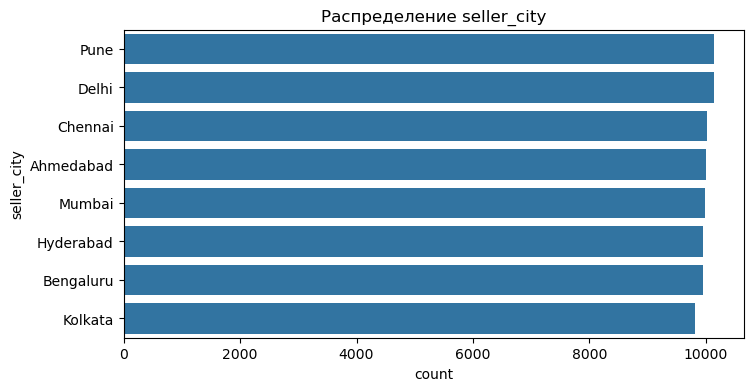

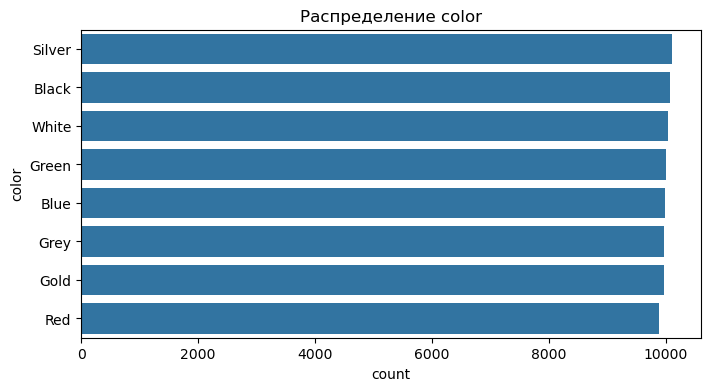

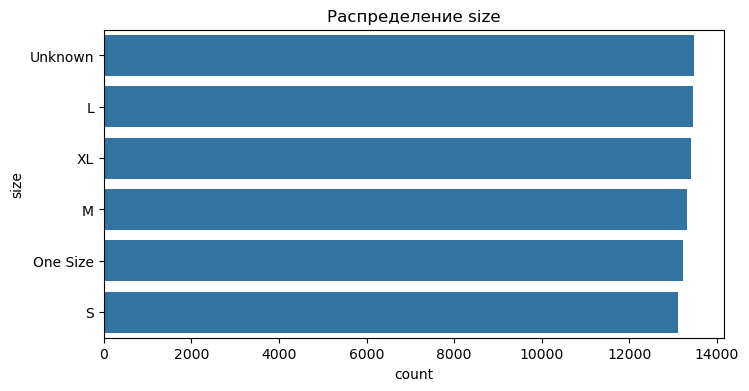

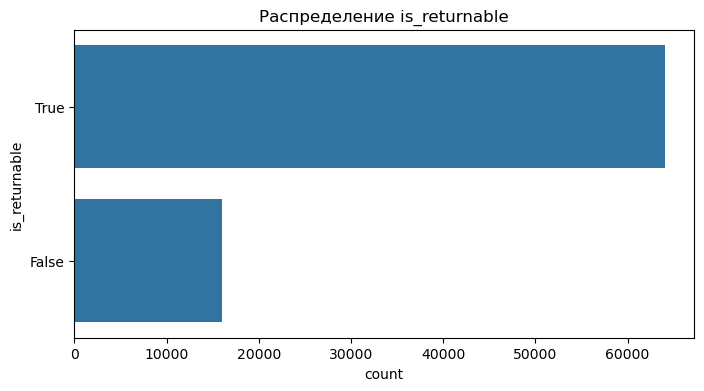

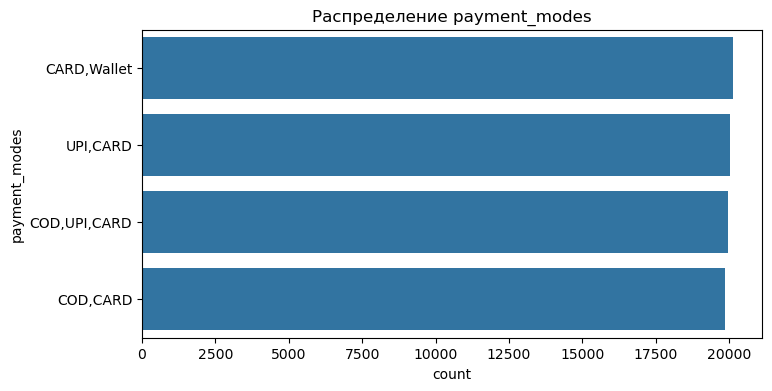

In [11]:
categorical_cols = ['category','brand','seller','seller_city','color','size',
                    'is_returnable','payment_modes']
for col in categorical_cols:
    counts = df[col].value_counts()
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=counts.index)
    plt.title(f'Распределение {col}')
    plt.savefig(f'../images/categories/{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

**Вывод:** Категориальные признаки в целом имеют сбалансированное распределение, без выраженных доминирующих категорий. Единственным ярко выраженным паттерном является преобладание возможности возврата товара, что отражает особенности бизнес-политики платформы.

## 6. Взаимодействие признаков

### 6.1 Boxplot (категориальный – числовой)

Цель: понять, как распределяется числовой признак в каждой категории

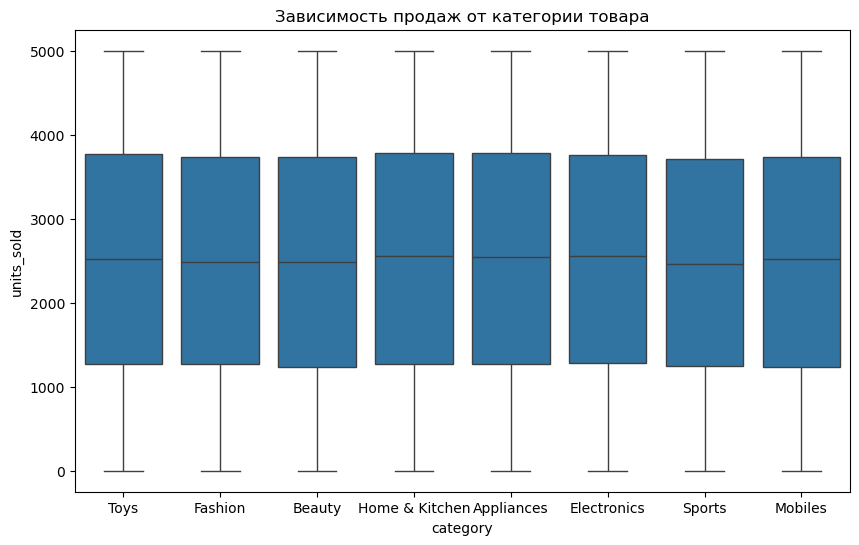

In [33]:
#зависимость продаж от категории 
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='units_sold', data=df)
plt.title('Зависимость продаж от категории товара')
plt.savefig(f'../images/categories/сategory_depend.png', dpi=300, bbox_inches='tight')
plt.show()

**Вывод:** Существенной зависимости между категорией товара и объемом продаж выявлено не было.

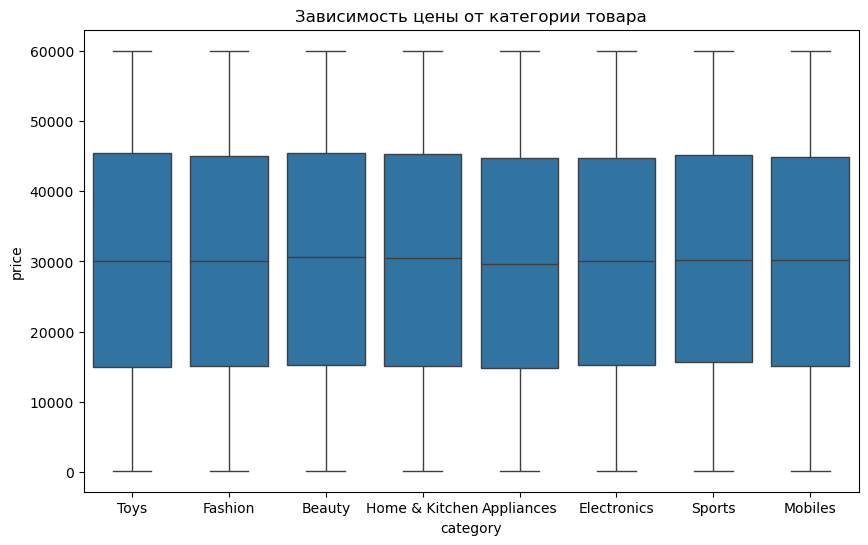

In [13]:
#зависимость цены от категории 
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Зависимость цены от категории товара')
plt.show()

**Вывод:** Существенной зависимости между категорией товара и ценой выявлено не было.

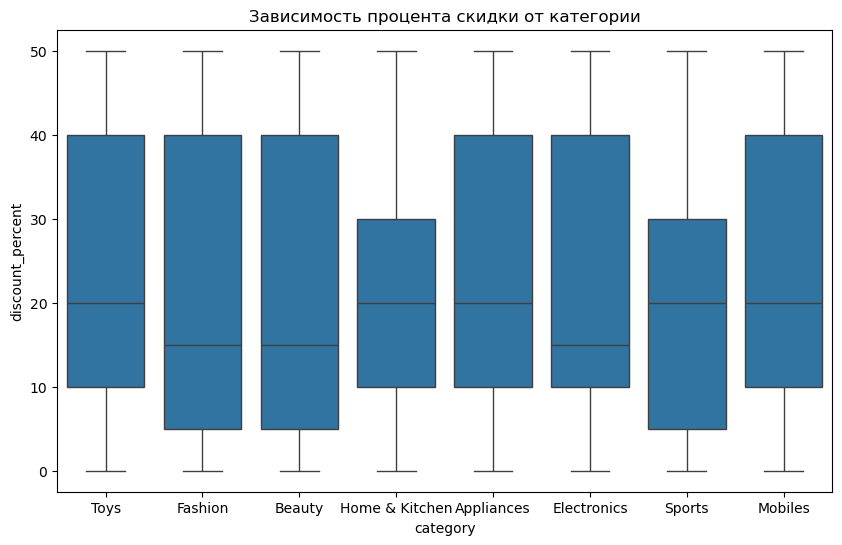

In [37]:
#зависимость скидки от категории товара
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='discount_percent', data=df)
plt.title('Зависимость процента скидки от категории')
plt.savefig(f'../images/categories/discount_depend.png', dpi=300, bbox_inches='tight')
plt.show()

**Вывод:** Медианные значения скидок находятся в диапазоне 15–20%: немного выше у категорий Toys, Home & Kitchen, Appliances, Sports и Mobiles и чуть ниже у Fashion, Beauty и Electronics. Межквартильный размах у большинства категорий примерно одинаковый, что говорит о сопоставимом уровне вариативности скидок. В целом график показывает отсутствие резких различий между категориями по уровню предоставляемых скидок.

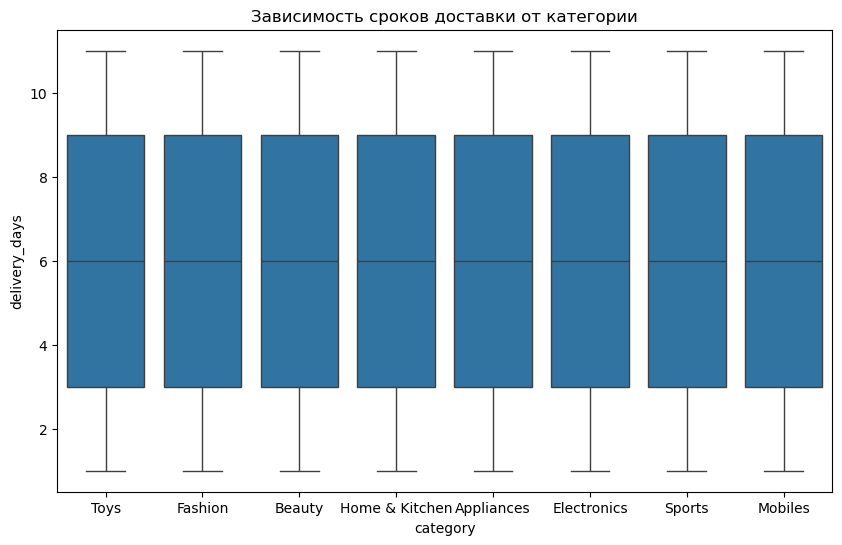

In [15]:
#зависимость срока доставки от категории
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='delivery_days', data=df)
plt.title('Зависимость сроков доставки от категории')
plt.show()

**Вывод**: Существенной зависимости между категорией товара и сроком доставки выявлено не было.

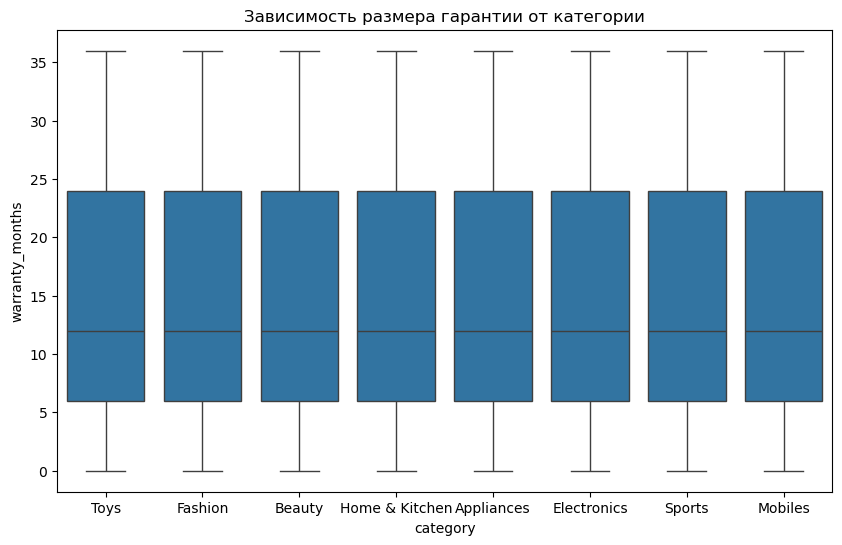

In [16]:
#зависимость размера гарантии от категории
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='warranty_months', data=df)
plt.title('Зависимость размера гарантии от категории')
plt.show()

**Вывод:** Существенной зависимости между категорией товара и размером гарантии выявлено не было.

### 6.2 Scatter plot для числовых признаков

Цель: посмотреть связь между двумя числовыми признаками

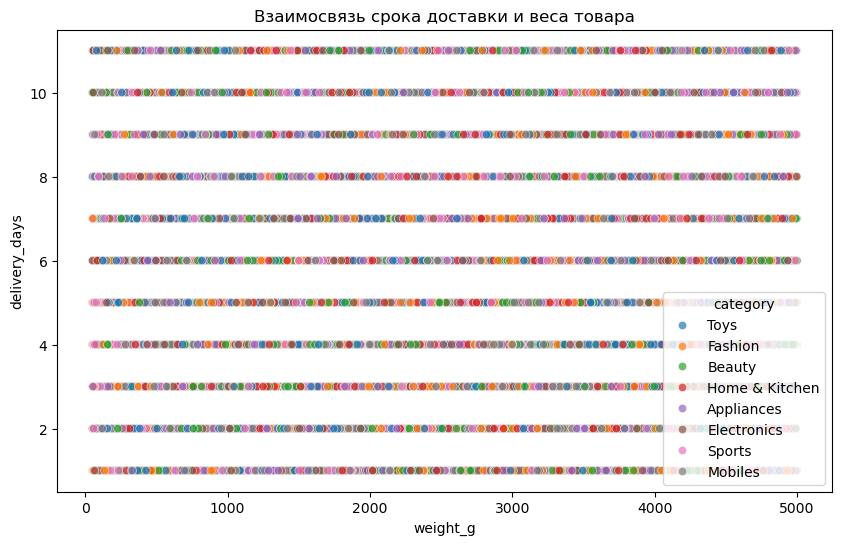

In [17]:
#взаимосвязь между сроками доставки и весом товара
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='weight_g',
    y='delivery_days',
    hue='category',
    data=df,
    alpha=0.7
)
plt.title('Взаимосвязь срока доставки и веса товара')
plt.show()

**Вывод**: Существенной зависимости между весом товара и сроком выявлено не было.

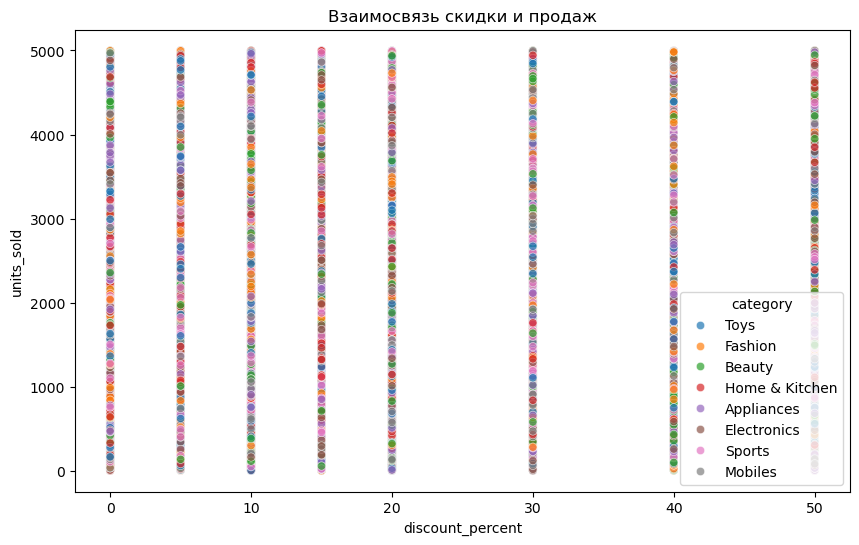

In [18]:
#взаимосвязь между размером скидки и количеством проданных позиций
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='discount_percent',
    y='units_sold',
    hue='category',
    data=df,
    alpha=0.7
)
plt.title('Взаимосвязь скидки и продаж')
plt.show()

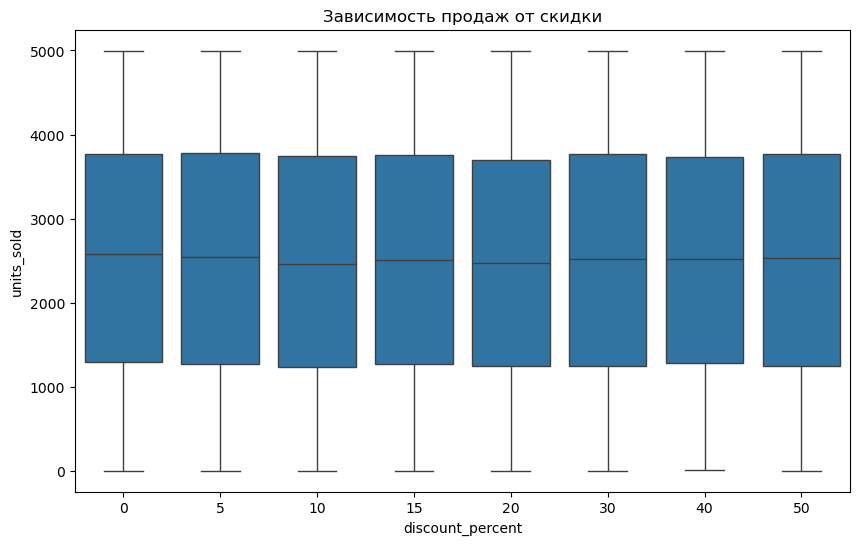

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='discount_percent', y='units_sold', data=df)
plt.title('Зависимость продаж от cкидки')
plt.show()

**Вывод**: Существенной зависимости между скидкой и продажами выявлено не было.

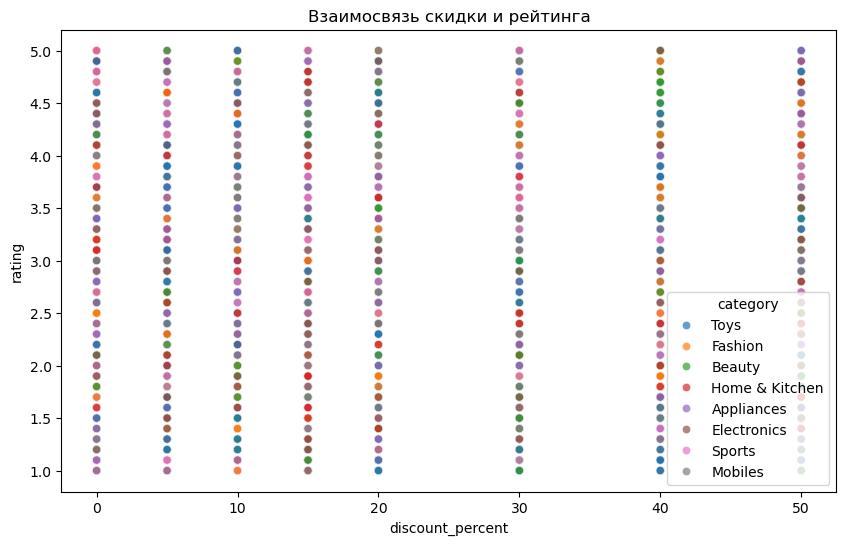

In [20]:
#взаимосвязь между скидкой и рейтингом
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='discount_percent',
    y='rating',
    hue='category',
    data=df,
    alpha=0.7
)
plt.title('Взаимосвязь скидки и рейтинга')
plt.show()

**Вывод**: Существенной зависимости между скидкой и рейтингом выявлено не было.

## 7. Проверка выбросов

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns  # числовые колонки
z_scores = np.abs(zscore(df[numeric_cols]))  # берём абсолютное значение
outliers = (z_scores > 3).any(axis=1)       # строка считается выбросом, если хоть один признак >3
print(f'Количество выбросов: {outliers.sum()}')

Количество выбросов: 0


## 8. Анализ выручки и ключевых метрик

**Цель:** понять, какие категории и продавцы приносят больше всего выручки, и как на выручку влияют скидки и рейтинг

In [22]:
# создаем новую колонку – выручка
df['revenue_m'] = df['final_price'] * df['units_sold']/ 1_000_000
df[['product_name', 'final_price', 'units_sold', 'revenue_m']].head()

,product_name,final_price,units_sold,revenue_m
0,Adidas Ultra 664,30215.24,66,1.994206
1,LG Series 124,27624.41,2703,74.668780
2,Redmi Model 35,30728.70,2394,73.564508
3,Sony Edition 769,23217.94,1732,40.213472
4,Boat Prime 291,14181.34,4644,65.858143


### 8.1 Выручка по категориям

In [23]:
#суммарная выручка по категориям 
revenue_by_category = df.groupby('category')['revenue_m'].sum().sort_values(ascending=False) / 1_000
#топ 3 категории по выручке
print(revenue_by_category.head(3))

category
Toys       606.448573
Beauty     605.815989
Fashion    599.555916
Name: revenue_m, dtype: float64


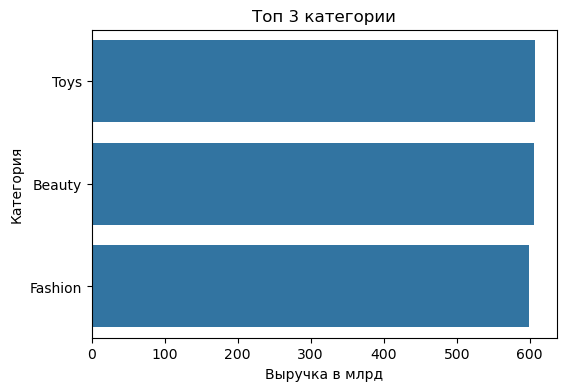

In [36]:
#визуализация топ 3 категории
top_categories = revenue_by_category.head(3)

plt.figure(figsize=(6,4))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Топ 3 категории')
plt.xlabel('Выручка в млрд')
plt.ylabel('Категория')
plt.savefig(f'../images/categories/top_3.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
#доля в процентах
top3_share = revenue_by_category.head(3).sum() / revenue_by_category.sum() * 100
print(f"Топ-3 категорий формируют {top3_share:.1f}% общей выручки")

Топ-3 категорий формируют 38.0% общей выручки


**Вывод:** Распределение выручки по категориям является умеренно равномерным, при этом топ-3 категории можно считать ключевыми драйверами дохода, однако их доминирование не является критичным. Это говорит о диверсифицированной структуре ассортимента и устойчивой модели дохода.

### 8.2 Связь выручки с рейтингом и скидкой

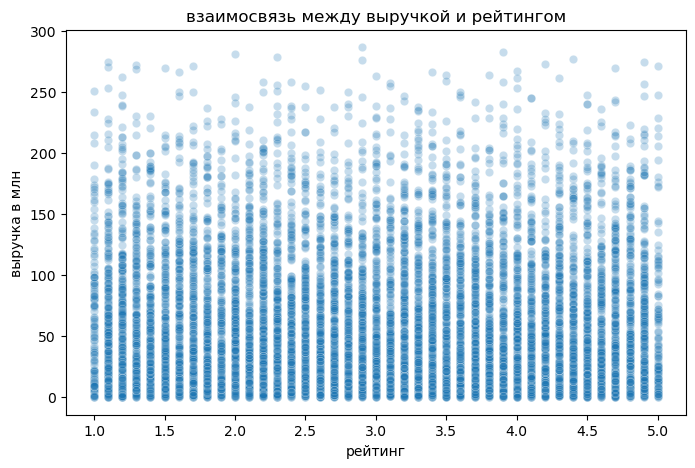

In [38]:
#Scatterplot: взаимосвязь между выручкой и рейтингом
plt.figure(figsize=(8,5))
sns.scatterplot(x='rating', y='revenue_m', data=df.sample(10000), alpha=0.25)
plt.title('взаимосвязь между выручкой и рейтингом')
plt.xlabel('рейтинг')
plt.ylabel('выручка в млн')
plt.savefig(f'../images/correlation/rating_depend.png', dpi=300, bbox_inches='tight')
plt.show()

**Вывод**: По scatterplot не наблюдается выраженной линейной зависимости между рейтингом товара и выручкой.
При любом уровне рейтинга присутствует широкий разброс значений выручки.
Это может означать, что рейтинг оказывает слабое влияние на продажи либо его эффект перекрывается другими факторами

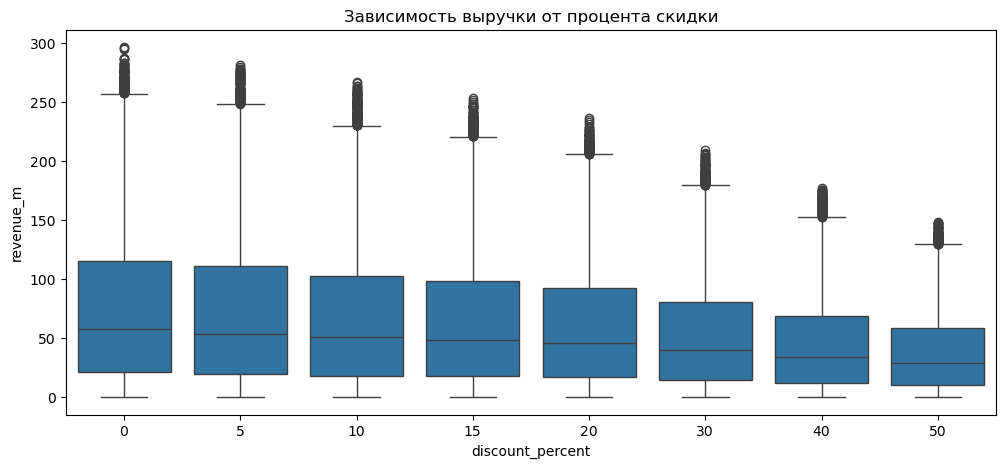

In [39]:
# Boxplot: зависимость выручки от скидки
plt.figure(figsize=(12,5))
sns.boxplot(x='discount_percent', y='revenue_m', data=df)
plt.title('Зависимость выручки от процента скидки')
plt.savefig(f'../images/correlation/discount_depend.png', dpi=300, bbox_inches='tight')
plt.show()

**Вывод**: Анализ boxplot показывает, что медианные значения выручки по различным уровням скидки остаются примерно на одном уровне, что указывает на отсутствие существенного роста типичной выручки при увеличении скидки.
При этом наиболее высокие значения выручки наблюдаются среди товаров без скидки, а с ростом процента скидки верхняя граница распределения выручки снижается.
Это может свидетельствовать о том, что наиболее успешные товары продаются хорошо без ценового стимулирования, а скидки чаще применяются к товарам с более низким спросом.
В целом данные указывают на слабую ценовую эластичность спроса в рассматриваемой выборке.

# Общий вывод по результатам EDA

Набор данных содержит **80 000 записей с 25 признаками**, включая числовые и категориальные данные. Пропусков и дубликатов нет, что обеспечивает высокое качество исходной информации.

### Ключевые наблюдения:

- **Цены и скидки**: 
  - Цены распределены равномерно в широком диапазоне, без выраженной асимметрии и выбросов, что отражает разнообразие товаров — от бюджетных до премиальных.  
  - Скидки имеют дискретные уровни (0%, 10%, 20%, 30%, 40%, 50%) и сосредоточены в диапазоне 10–40%, медиана около 20%. Финальная цена со скидкой демонстрирует правостороннюю асимметрию: дешёвых товаров больше, дорогие встречаются реже.

- **Рейтинг товаров**: распределён симметрично вокруг медианы 3, с частыми значениями, но без выраженных выбросов.

- **Политика возврата**: представлена дискретными значениями, встречающимися примерно одинаково часто. Медиана — 10 дней, редкий выброс на 30 дней отражает редкие длительные варианты возврата.

- **Вес при транспортировке**: распределение с правосторонней асимметрией — лёгкие и средние товары встречаются чаще, тяжёлые — реже.

- **Категориальные признаки**: в целом сбалансированы, без доминирующих категорий. Основной паттерн — преобладание возможности возврата товара, что отражает бизнес-политику платформы. Существенных зависимостей между категорией товара и ключевыми метриками (**цена, продажи, срок доставки, размер гарантии**) не выявлено.

- **Взаимосвязь признаков**:  
  - Линейные зависимости между ценой, скидкой, рейтингом и продажами отсутствуют.  
  - Межквартильный размах скидок у категорий примерно одинаковый, медианы 15–20%.  
  - Выручка распределена умеренно равномерно по категориям; топ-3 категории — основные драйверы дохода, но их доминирование не критично.  
  - Scatterplot и boxplot показывают слабое влияние рейтинга и скидки на выручку, а наибольшие значения выручки наблюдаются у товаров без скидки, что указывает на слабую ценовую эластичность спроса.

- **Выбросы и ключевые метрики**: явных выбросов нет, за исключением редких тяжёлых товаров и длительных вариантов возврата. Разброс выручки присутствует при любом уровне рейтинга, что отражает влияние множества факторов на продажи.

### Вывод

Данные **качественные, корректные и готовые к дальнейшему анализу**. Распределение ключевых признаков соответствует бизнес-логике: широкий ценовой диапазон, типичные уровни скидок, умеренно равномерная выручка, редкие тяжёлые товары и длительные варианты возврата.  

Существенных линейных зависимостей между основными метриками не выявлено, что указывает на сложную структуру спроса и влияние скрытых факторов (сезонность, маркетинговые акции, ассортиментная стратегия).  


# Сформулированные гипотезы

На основе проведённого EDA были сформулированы следующие гипотезы:
1. **Ценовой сегмент и выручка:** медианная выручка увеличивается с повышением ценового сегмента (Low < Mid < High), что указывает на зависимость продаж от ценовой категории товара.
  
2. **Влияние рейтинга на продажи:** рейтинг товара не оказывает значимого линейного влияния на выручку, однако возможны скрытые эффекты, связанные с ценовым сегментом или сезонностью.
  
3. **Сезонность продаж:** продажи демонстрируют повторяющиеся пики в определённые месяцы, что может отражать сезонный спрос.

4. **Влияние быстрой доставки:** товары с коротким сроком доставки или более быстрой логистикой могут показывать более высокую выручку, особенно в пиковые сезоны.

# Сохранение данных

In [28]:
#сохраняем новый csv файл
df.to_csv('../data/flipkard_after_EDA.csv', index=False)